In [3]:
# upload data

from google.colab import files
uploaded = files.upload()

In [4]:
# read the csv into a pandas dataframe

import pandas as pd

df = pd.read_csv('results.csv')

print(df.shape)
df.head()

(40839, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# check for NaN values

df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [7]:
# format the date column into pandas datetime

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
df['Location'] = df['city'].map(str) + ', ' + df['country']

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Location
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,"Glasgow, Scotland"
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,"London, England"
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,"Glasgow, Scotland"
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,"London, England"
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,"Glasgow, Scotland"


In [9]:
# make 2 new dataframes for neutral and non-neutral matches

neutral_1 = df[df['neutral'] == True]
neutral_0 = df[df['neutral'] == False]

# make 2 new dataframes for non-neutral US matches at home and away

home = neutral_0[neutral_0['home_team'] == "United States"]
away = neutral_0[neutral_0['away_team'] == "United States"]

# find all neutral US matches

neutral1 = neutral_1[neutral_1['home_team'] == "United States"]
neutral2 = neutral_1[neutral_1['away_team'] == 'United States']

# get the US to be in the home_team for simplicity

neutral2[['away_team', 'home_team']] = neutral2.loc[:, ['home_team', 'away_team']]
                       
# concat all US neutral matches into one dataframe

neutral = pd.concat([neutral1, neutral2])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [10]:
# define function to get total number of matches and number of matches won, lost and tied.

def lostwontied(data):
  print("Total: " + str(data.index.size))
  print("\nWon: " + str(data[data['home_score'] > data['away_score']].index.size))
  print("\nLost: " + str(data[data['home_score'] < data['away_score']].index.size))
  print("\nTied: " + str(data[data['home_score'] == data['away_score']].index.size))
  return 
  
lostwontied(home)

Total: 391

Won: 210

Lost: 92

Tied: 89


In [11]:
lostwontied(away)

Total: 219

Won: 118

Lost: 59

Tied: 42


In [12]:
lostwontied(neutral)

Total: 70

Won: 31

Lost: 27

Tied: 12


In [13]:
# initialize list of lists 
data1 = [['Neutral', 70, 27, 31+27], ['Away', 59, 118, 118+59], ['Home', 391, 92, 210+92]] 
  
# Create the pandas DataFrame 
df1 = pd.DataFrame(data1, columns = ['type', 'Total matches', 'Losses', 'Wins+losses'])

# print dataframe. 
df1 

,type,Total matches,Losses,Wins+losses
0,Neutral,70,27,58
1,Away,59,118,177
2,Home,391,92,302


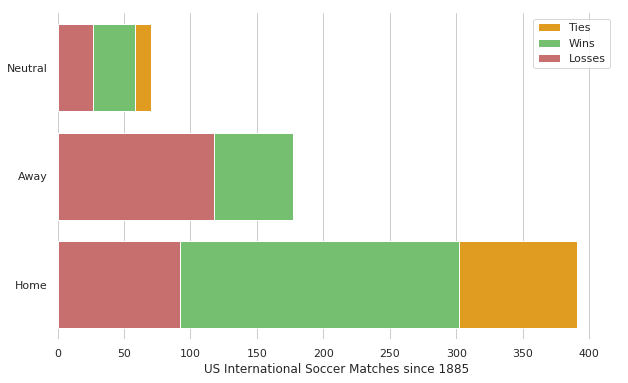

In [14]:
# graph number of matches won lost and tied

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plot the total games which will end up representing the ties
sns.set_color_codes("pastel")
sns.barplot(x="Total matches", y="type", data=df1,
            label="Ties", color="orange")

# Plot the win, which is actually wins+losses to show properly
sns.set_color_codes("muted")
sns.barplot(x="Wins+losses", y="type", data=df1,
            label="Wins", color="g")

# Plot the losses
sns.set_color_codes("muted")
sns.barplot(x="Losses", y="type", data=df1,
            label="Losses", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlim=(0, 420), ylabel="",
       xlabel="US International Soccer Matches since 1885")
sns.despine(left=True, bottom=True)

In [15]:
# initialize list of lists 
data2 = [['Neutral', 27, 31, 12], ['Away', 59, 118, 42], ['Home', 92, 210, 89]] 
  
# Create the pandas DataFrame 
df2 = pd.DataFrame(data2, columns = ['type', 'Losses', 'Wins', 'Ties'])
df2.set_index('type', inplace=True)

# print dataframe. 
df2 

,Losses,Wins,Ties
type,,,
Neutral,27,31,12
Away,59,118,42
Home,92,210,89


In [16]:
df2 = df2.div(df2.sum(axis=1), axis=0).reset_index()

df2['loss+win'] = df2['Losses'] + df2['Wins']
df2['total'] = 1

df2

,type,Losses,Wins,Ties,loss+win,total
0,Neutral,0.385714,0.442857,0.171429,0.828571,1
1,Away,0.269406,0.538813,0.191781,0.808219,1
2,Home,0.235294,0.537084,0.227621,0.772379,1


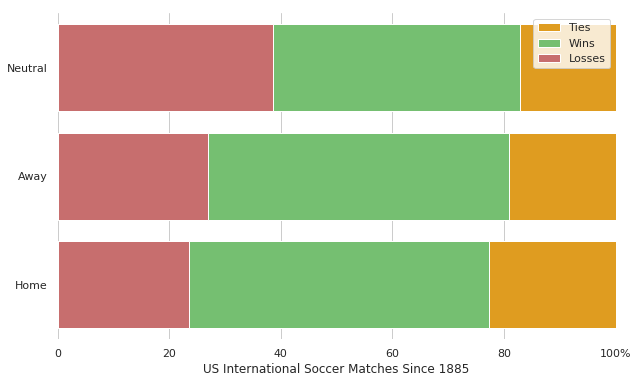

In [17]:
# normalized win loss ties

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# ax.set_xticks([0, .2, .4, .6, .8, 1], minor=False)

# labels_x = [item.get_text() for item in ax.get_xticklabels()]
# labels_x[0] = "0"
# labels_x[1] = "20"
# labels_x[2] = "40"
# labels_x[3] = "60"
# labels_x[4] = "80"
# labels_x[5] = "100%"

# Plot the total games which will end up representing the ties
sns.set_color_codes("pastel")
sns.barplot(x="total", y="type", data=df2,
            label="Ties", color="orange").set(xticklabels=[0, 20, 40, 60, 80, '100%'])

# Plot the win, which is actually wins+losses to show properly
sns.set_color_codes("muted")
sns.barplot(x="loss+win", y="type", data=df2,
            label="Wins", color="g")

# Plot the losses
sns.set_color_codes("muted")
sns.barplot(x="Losses", y="type", data=df2,
            label="Losses", color="r")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="US International Soccer Matches Since 1885")
sns.despine(left=True, bottom=True)

In [0]:
# define function to get longitude and latitude of location

def geopycode(data):
  from geopy.geocoders import Nominatim
  from geopy.extra.rate_limiter import RateLimiter
  from tqdm import tqdm
  
  geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
  
  tqdm.pandas()
  
  data['Location'] = data['Location'].progress_apply(geocode)
  data['Coord'] = data['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
  
  return

In [0]:
home = pd.read_csv('home.csv')
away = pd.read_csv('away.csv')
neutral = pd.read_csv('neutral.csv')

In [0]:
home['Coord'] = home['Coord'].str.strip('\(\)')
away['Coord'] = away['Coord'].str.strip('\(\)')
neutral['Coord'] = neutral['Coord'].str.strip('\(\)')

In [0]:
def rowsplit(data):
  import numpy as np

  lat = []
  long = []

  for row in data['Coord']:
      try:
          lat.append(row.split(',')[0])
          long.append(row.split(',')[1])
      except:
          lat.append(np.NaN)
          long.append(np.NaN)

  data['lat'] = lat
  data['long'] = long

In [0]:
rowsplit(home)
rowsplit(away)
rowsplit(neutral)

In [0]:
home['lat'] = home['lat'].astype(float)
home['long'] = home['long'].astype(float)
away['lat'] = away['lat'].astype(float)
away['long'] = away['long'].astype(float)
neutral['lat'] = neutral['lat'].astype(float)
neutral['long'] = neutral['long'].astype(float)

In [0]:
home = home.drop('Unnamed: 0', axis=1)
away = away.drop('Unnamed: 0', axis=1)
neutral = neutral.drop('Unnamed: 0', axis=1)

In [25]:
usa = pd.concat([home, away, neutral], sort=False)
usa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Location,Coord,lat,long,geocode
0,1885-11-28,United States,Canada,0,1,Friendly,Newark,United States,False,"Newark, Essex County, New Jersey, USA","40.735657, -74.1723667, 0.0",40.735657,-74.172367,NaN
1,1886-11-25,United States,Canada,3,2,Friendly,Newark,United States,False,"Newark, Essex County, New Jersey, USA","40.735657, -74.1723667, 0.0",40.735657,-74.172367,NaN
2,1925-11-08,United States,Canada,6,1,Friendly,New York,United States,False,"NYC, New York, United States of America","40.7127281, -74.0060152, 0.0",40.712728,-74.006015,NaN
3,1926-11-06,United States,Canada,6,2,Friendly,New York,United States,False,"NYC, New York, United States of America","40.7127281, -74.0060152, 0.0",40.712728,-74.006015,NaN
4,1935-05-19,United States,Scotland,1,5,Friendly,New York,United States,False,"NYC, New York, United States of America","40.7127281, -74.0060152, 0.0",40.712728,-74.006015,NaN


In [0]:
usa.to_csv('usasoccer.csv')

In [27]:
usa['tournament'].unique()

array(['Friendly', 'FIFA World Cup qualification', 'NAFU Championship',
       'Gold Cup', 'USA Cup', 'FIFA World Cup', 'Copa América',
       'Korea Cup', 'Confederations Cup', 'Kirin Cup',
       'Lunar New Year Cup'], dtype=object)

In [0]:
tournament_id = {'Friendly': 1, 'FIFA World Cup qualification': 2, 'NAFU Championship': 3,
       'Gold Cup': 4, 'USA Cup': 5, 'FIFA World Cup': 6, 'Copa América': 7,
       'Korea Cup': 8, 'Confederations Cup': 9, 'Kirin Cup': 10,
       'Lunar New Year Cup': 11}

In [0]:
usa['tournament_id'] = usa['tournament'].map(tournament_id)

In [30]:
!pip install plotly==4.1.0

In [31]:
import colorlover as cl
from IPython.display import HTML
HTML(cl.to_html( cl.scales['11'] ))

In [32]:
paired = cl.scales['11']['qual']['Paired']
HTML( cl.to_html(paired) )

In [33]:
import plotly.graph_objects as go

usa['text'] = usa['date'] + '<br>' + usa['city'] + ' - ' + usa['tournament'] + '<br>' + usa['home_team'] + ' vs. ' + usa['away_team'] + '<br>' + 'Score: ' + usa['home_score'].astype(str) + ' - ' + usa['away_score'].astype(str) 

fig = go.Figure(data=go.Scattergeo(
        lon = usa['long'],
        lat = usa['lat'],
        text = usa['text'],
        mode = 'markers',
        marker_colorscale = paired,
        marker_color = usa['tournament_id'],
        
        ))

fig.update_layout(
        title = 'US International Soccer Matches Since 1885',
        geo_scope='world',
        geo_projection_type="natural earth"
    )
fig.show()